In [2]:
pip install pandas numpy matplotlib seaborn scikit-learn missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
# importing necessary Llibraries: 
import pandas as pd # importing the dataframe and it is used for data cleaning and analysis. 
import seaborn as sns # used for plotting statistical graphics
import matplotlib.pyplot as plt # used to create 2D graphs and plots 
import os
import pickle
import warnings # warnings module suppresses repeated warnings from the same source to cut down on the annoyance of seeing the same message over and over.
warnings.filterwarnings("ignore") # ignore warnings

Data cleaning and Preprocessing

In [4]:
# reading the dataset

df = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\swiggy.csv")

In [5]:
# dataset overview
# univariate analysis

df.info() # gives the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [6]:
# gives the first 5 rows of the dataset
df.head()

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu
0,567335,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas",22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery",12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json
3,187912,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian",22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json
4,543530,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food",12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json


In [7]:
# changing the datatypes

df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')
df['cost'] = df['cost'].str.split(" ").str[1]
df['cost'] = pd.to_numeric(df['cost'], errors = 'coerce')



In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            148541 non-null  int64  
 1   name          148455 non-null  object 
 2   city          148541 non-null  object 
 3   rating        61441 non-null   float64
 4   rating_count  148455 non-null  object 
 5   cost          148410 non-null  float64
 6   cuisine       148442 non-null  object 
 7   lic_no        148312 non-null  object 
 8   link          148541 non-null  object 
 9   address       148455 non-null  object 
 10  menu          148541 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 12.5+ MB


In [9]:
# statistical information about the dataset

df.describe() 

,id,rating,cost
count,148541.000000,61441.000000,148410.000000
mean,363466.378912,3.894461,287.600714
std,167890.977174,0.460058,796.730688
min,211.000000,1.000000,1.000000
25%,233320.000000,3.700000,200.000000
50%,412628.000000,4.000000,250.000000
75%,502223.000000,4.200000,300.000000
max,581031.000000,5.000000,300350.000000


In [10]:
df.shape # gives the shape of the dataset

(148541, 11)

In [11]:
df.columns # gives the columns of the dataset

Index(['id', 'name', 'city', 'rating', 'rating_count', 'cost', 'cuisine',
       'lic_no', 'link', 'address', 'menu'],
      dtype='object')

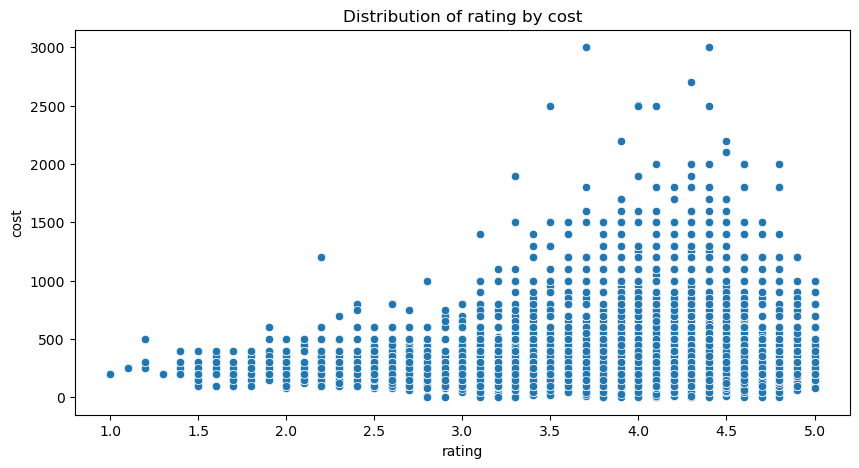

In [12]:
# Bi-variate analysis

plt.figure(figsize=(10, 5))
sns.scatterplot(data = df, x = "rating", y ='cost')
plt.title('Distribution of rating by cost')
plt.show()

In [13]:
df[df.duplicated()]

,id,name,city,rating,rating_count,cost,cuisine,lic_no,link,address,menu


In [14]:
# droping the duplicates

df.drop_duplicates(inplace=True)

<Axes: >

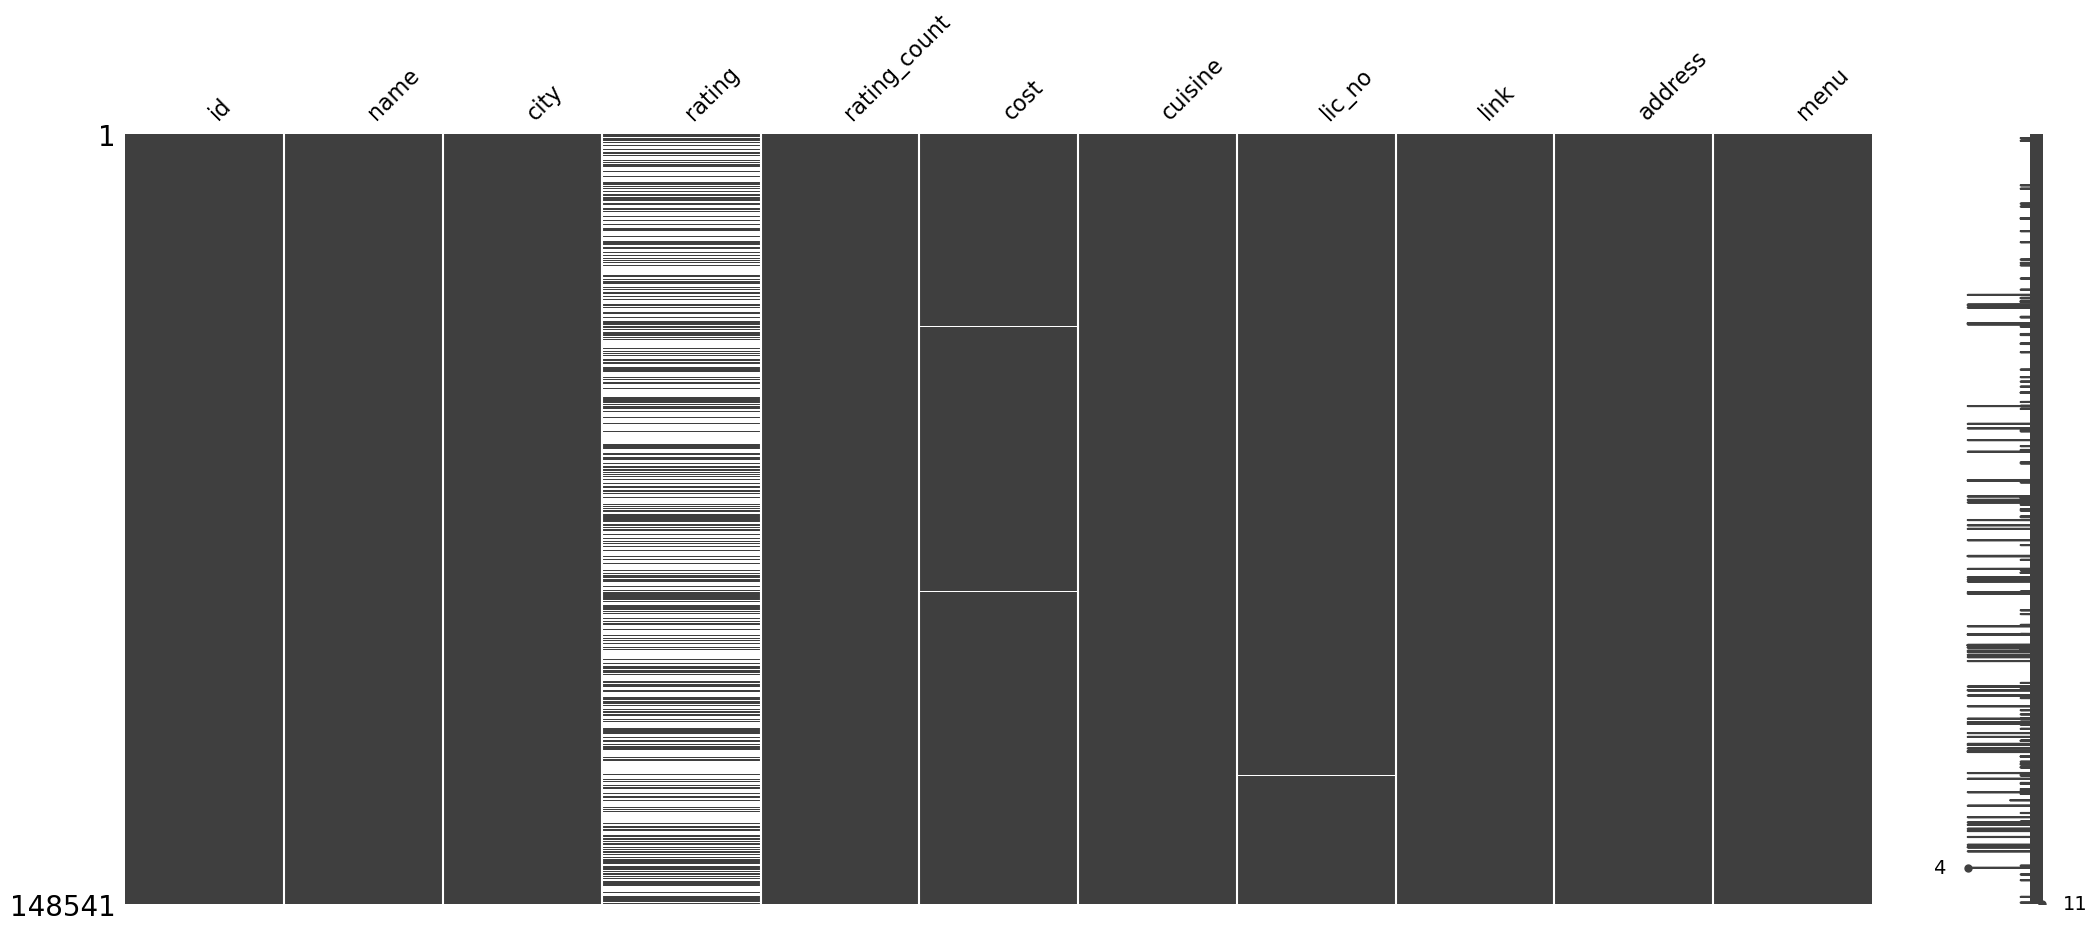

In [15]:
# checking for missing values in the dataset
import missingno as msno # used to visualize missing data in the dataset
msno.matrix(df) # gives the visualization of missing values in the dataset


In [16]:
df.isnull().sum()

id                  0
name               86
city                0
rating          87100
rating_count       86
cost              131
cuisine            99
lic_no            229
link                0
address            86
menu                0
dtype: int64

In [17]:
df['rating'].fillna(df['rating'].mean(), inplace=True)

In [18]:
df.shape

(148541, 11)

In [19]:
df.dropna(inplace = True)

In [20]:
df.shape

(148255, 11)

In [21]:
df.isnull().sum()

id              0
name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
lic_no          0
link            0
address         0
menu            0
dtype: int64

In [22]:
output_dir = 'D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data'
os.makedirs(output_dir, exist_ok=True)
cleaned_filepath = os.path.join(output_dir, "Cleaned_data.csv")
df.to_csv(cleaned_filepath, index=False)

In [23]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize the OneHotEncoder with sparse=False
encoder = OneHotEncoder(sparse_output=True)  # Use sparse_output=False to get a dense array

# Fit and transform the categorical columns
one_hot_encoded = encoder.fit_transform(df[['name', 'city', 'cuisine']])

# Convert the array into a DataFrame
one_hot_df = pd.DataFrame.sparse.from_spmatrix(one_hot_encoded, columns=encoder.get_feature_names_out(['name', 'city', 'cuisine']))

# Concatenate with the original DataFrame
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(['name', 'city', 'cuisine'], axis=1)

# Display the first few rows
df_encoded.head()


,id,rating,rating_count,cost,lic_no,link,address,menu,name_!PUNJ,"name_"" KAMAT (Original)- Siripuram""",...,"cuisine_Vietnamese,Pizzas","cuisine_Vietnamese,Snacks",cuisine_Waffle,"cuisine_Waffle,Bakery","cuisine_Waffle,Beverages","cuisine_Waffle,Chinese","cuisine_Waffle,Desserts","cuisine_Waffle,Fast Food","cuisine_Waffle,Ice Cream","cuisine_Waffle,Snacks"
0,567335.0,3.894461,Too Few Ratings,200.0,22122652000138,https://www.swiggy.com/restaurants/ab-foods-po...,"AB FOODS POINT, NEAR RISHI NARANG DENTAL CLINI...",Menu/567335.json,0,0,...,0,0,0,0,0,0,0,0,0,0
1,531342.0,4.400000,50+ ratings,200.0,12117201000112,https://www.swiggy.com/restaurants/janta-sweet...,"Janta Sweet House, Bazar No.9, Circullar Road,...",Menu/531342.json,0,0,...,0,0,0,0,0,0,0,0,0,0
2,158203.0,3.800000,100+ ratings,100.0,22121652000190,https://www.swiggy.com/restaurants/theka-coffe...,"theka coffee desi, sahtiya sadan road city",Menu/158203.json,0,0,...,0,0,0,0,0,0,0,0,0,0
3,187912.0,3.700000,20+ ratings,250.0,22119652000167,https://www.swiggy.com/restaurants/singh-hut-n...,"Singh Hut, CIRCULAR ROAD NEAR NEHRU PARK ABOHAR",Menu/187912.json,0,0,...,0,0,0,0,0,0,0,0,0,0
4,543530.0,3.894461,Too Few Ratings,250.0,12122201000053,https://www.swiggy.com/restaurants/grill-maste...,"GRILL MASTERS, ADA Heights, Abohar - Hanumanga...",Menu/543530.json,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_encoded.shape

(148540, 115643)

In [25]:
filename = os.path.join(output_dir, 'encoder.pkl')
pickle.dump(df_encoded, open(filename,'wb'))

In [ ]:
encoded_filepath = os.path.join(output_dir, "Encoded_data.csv")
df_encoded.to_csv(encoded_filepath, index=False)

In [ ]:
# Load the datasets
cleaned_data = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\Cleaned_data.csv", index_col=0)  # Ensure index is loaded
encoded_data = pd.read_csv(r"D:\Guvi_Project\Swiggy’s Restaurant Recommendation System\Data\Encoded_data.csv", index_col=0)  # Ensure index is loaded


# Compare indices
if not cleaned_data.index.equals(encoded_data.index):
    print("Warning: Indices do not match!")
else:
    print("Indices match successfully.")